# Yusuf Kerim Ciger - Algorithmic Data Science Report 1

### Necessary imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import sys ### Imported just because print the built-in libraries version ( math & time & combinations )
import math
from itertools import combinations

In [35]:
print( f'Pandas version: { pd.__version__ }')
print( f'Numpy version: { np.__version__ }')
print( f'Matplotlib version: { matplotlib.__version__}')
print( f'Math version: { sys.version }') 
print( f'Time version: { sys.version }')
print( f'Itertools Combination version: { sys.version }')

Pandas version: 2.2.3
Numpy version: 2.0.2
Matplotlib version: 3.9.2
Math version: 3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.1.0.2.5)]
Time version: 3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.1.0.2.5)]
Itertools Combination version: 3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.1.0.2.5)]


### Reading the data

In [36]:
DATA_PATH = 'data/data2024.csv'

df = pd.read_csv(DATA_PATH, index_col=0)
df.head()

doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
Abashed      0     0     0     0     0     0     0     0     0      0      0   
Abednego     0     0     0     0     0     0     0     0     0      0      0   
Abel         0     0     0     0     0     0     0     1     0      0      0   
Abjectus     0     0     0     0     0     0     1     0     0      0      0   
Aboard       0     0     0     0     0     1     0     0     0      0      0   

          doc12  doc13  doc14  doc15  
Abashed       0      0      1      0  
Abednego      0      1      0      0  
Abel          0      0      0      0  
Abjectus      0      0      0      0  
Aboard        0      0      0      0

In [37]:
df.shape

(21198, 15)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21198 entries, Abashed to zoology
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   doc1    21198 non-null  int64
 1   doc2    21198 non-null  int64
 2   doc3    21198 non-null  int64
 3   doc4    21198 non-null  int64
 4   doc5    21198 non-null  int64
 5   doc6    21198 non-null  int64
 6   doc7    21198 non-null  int64
 7   doc8    21198 non-null  int64
 8   doc9    21198 non-null  int64
 9   doc10   21198 non-null  int64
 10  doc11   21198 non-null  int64
 11  doc12   21198 non-null  int64
 12  doc13   21198 non-null  int64
 13  doc14   21198 non-null  int64
 14  doc15   21198 non-null  int64
dtypes: int64(15)
memory usage: 2.6+ MB


### Global Timing Functions Tken from Labs

In [39]:
def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
  
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

### 1 &rarr; Present an analysis of the theoretical running time of the cosine similarity measure applied to a pair of documents with data in the format of the provided data matrix. Test your analysis empirically by timing and plotting various calculations of cosine similarity on your computer. Estimate the key constant in the formula for the run-time, for your implementation and computer. Compare using the implementation of the dot product in numpy with your own implementation.

In [40]:
data_matrix = df.iloc[:15,:].values
data_matrix.shape

(15, 15)

#### &rarr; Cosine Similarity Func using Numpy

In [41]:
def cosine_similarity_numpy(doc1, doc2):
    '''
    parameters:
        doc1: A numpy array representing a document
        doc2: A numpy array representing a document

    Output:
        dot_product: A float representing the dot product of the two documents
        norm1: A float representing the norm of the first document
        norm2: A float representing the norm of the second document

    Return:
        A float representing the cosine similarity between the two documents
    '''
    dot_product = np.dot(doc1, doc2)
    norm1 = np.linalg.norm(doc1)
    norm2 = np.linalg.norm(doc2)
    return 0 if ( norm1 * norm2 == 0 ) else dot_product / (norm1 * norm2)

#### &rarr; Cosine Similarity Func Using Manual ( Fetched From Labs )

In [42]:
def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
        
    return total

def cosine(v1,v2):
    
    dot_product = dot(v1,v2)
    denominator = math.sqrt(dot(v1,v1)*dot(v2,v2))
    return 0 if denominator == 0 else dot_product / denominator

#### &rarr; Comparing Numpy AND Manual Functions

In [43]:
data_matrix = df.iloc[:15,:].values
data_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

#### &rarr; Give a Sample

In [44]:
doc1 = df['doc13'] # df[:, 13] 
doc2 = df['doc12'] # df[:, 12] 


np_version_sim = cosine_similarity_numpy(doc1, doc2)
manual_sim = cosine(doc1, doc2)

print(f'Numpy version: {np_version_sim: .5f}')
print(f'Manual version: {manual_sim: .5f}')

np_time = timeit(cosine_similarity_numpy, doc1, doc2, repeats=10)
manual_time = timeit(cosine, doc1, doc2, repeats=10)

print(f'Numpy time: {np_time}')
print(f'Manual time: {manual_time}')

/var/folders/tg/zjfz4cr97zs35vz602jb_ztr0000gn/T/ipykernel_20943/2886734983.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total+=v1[i]*v2[i]


Numpy version:  0.98526
Manual version:  0.98526
Numpy time: (np.float64(7.886886596679688e-05), np.float64(4.778812421892862e-05))
Manual time: (np.float64(0.37321422100067136), np.float64(0.00461835513408569))


#### &rarr; Plotting Timing Comparisons

In [45]:
data_matrix = df.values

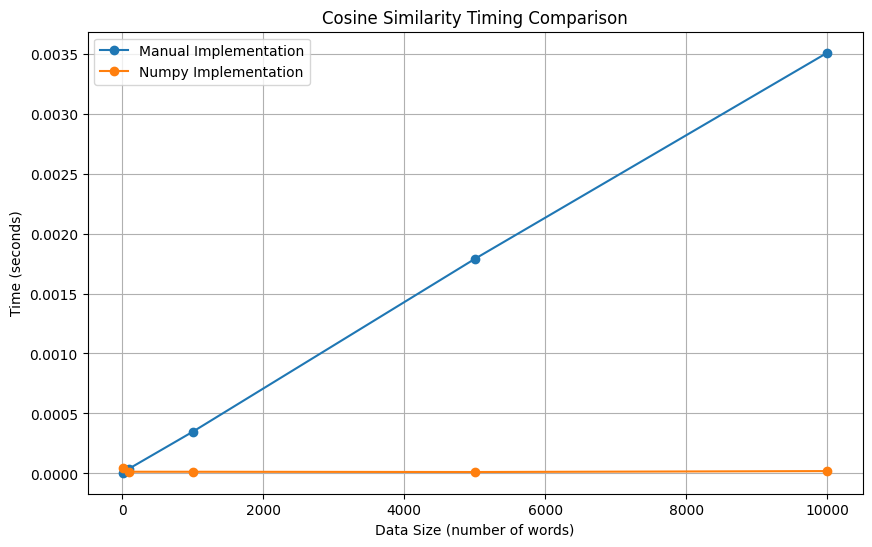

In [46]:
SIZES = [ 10, 100, 1000, 5000, 10000 ]
numpy_times = []
manual_times = []

doc1 = data_matrix[:, 13] # 13th column
doc2 = data_matrix[:, 12] # 12th column

for size in SIZES:
    doc1_subset = doc1[: size]
    doc2_subset = doc2[: size]
    
    # Timing manual implementation
    manual_mean, manual_std = timeit(cosine, doc1_subset, doc2_subset, repeats=10)
    manual_times.append(manual_mean)

    # Timing numpy implementation
    numpy_mean, numpy_std = timeit(cosine_similarity_numpy, doc1_subset, doc2_subset, repeats=10)
    numpy_times.append(numpy_mean)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(SIZES, manual_times, label="Manual Implementation", marker="o")
plt.plot(SIZES, numpy_times, label="Numpy Implementation", marker="o")
plt.xlabel("Data Size (number of words)")
plt.ylabel("Time (seconds)")
plt.title("Cosine Similarity Timing Comparison")
plt.legend()
plt.grid(True)
plt.show() 

### &rarr; Logging the timings and finding the constans

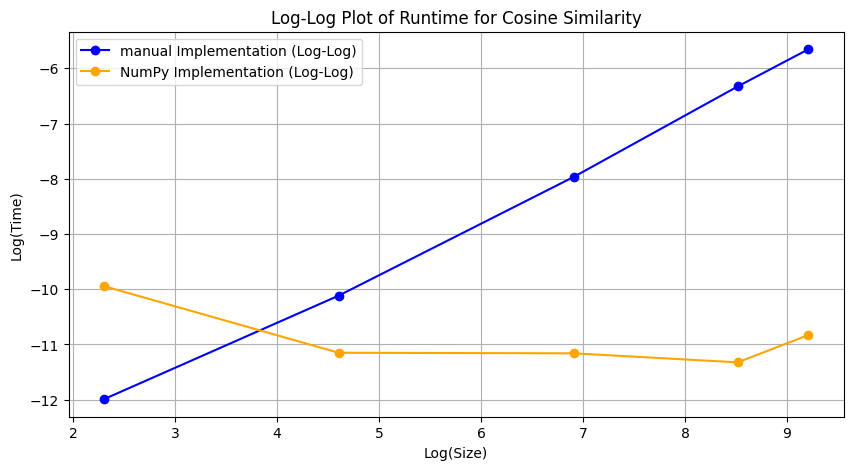

Manual Constans  Numpy Constans
10        6.198883e-07    4.808903e-06
100       4.048347e-07    1.437664e-07
1000      3.468990e-07    1.423359e-08
5000      3.575659e-07    2.417564e-09
10000     3.507113e-07    1.983643e-09

In [47]:
log_sizes = [math.log(size) for size in SIZES]
log_manual_times = [math.log(time) for time in manual_times]
log_numpy_times = [math.log(time) for time in numpy_times]

plt.figure(figsize=(10, 5))
plt.plot(log_sizes, log_manual_times, label="manual Implementation (Log-Log)", color='blue', marker="o")
plt.plot(log_sizes, log_numpy_times, label="NumPy Implementation (Log-Log)", color='orange', marker="o")
plt.xlabel("Log(Size)")
plt.ylabel("Log(Time)")
plt.title("Log-Log Plot of Runtime for Cosine Similarity")
plt.legend()
plt.grid(True)
plt.show()

# Finding constans
manual_constants = [float(manual / size) for manual, size in zip(manual_times, SIZES)]
numpy_constants = [float(numpy / size) for numpy, size in zip(numpy_times, SIZES)]

constans = {
    'Manual Constans': manual_constants,
    'Numpy Constans': numpy_constants
}

const_df = pd.DataFrame(constans, columns=['Manual Constans', 'Numpy Constans'], index=SIZES)
const_df

### 2 &rarr; Present an analysis of the theoretical running time of Jaccard’s similarity measure applied to a pair of documents with data in the format of the provided data matrix. Test your analysis empirically by timing and plotting various calculations of Jaccard similarity on your computer. Estimate the key constant in the formula for the run-time, for your implementation and computer.

In [48]:
def maketotal(doc_list: list):
    '''
    Calculates the total sum of the elements in a list.
    
    Parameters:
    doc_list (list): A list of numerical values.
    
    Returns:
    float: The sum of all elements in the input list.
    '''
    return np.sum( doc_list )

def jaccard( doc1: list, doc2: list ):
    intersection = [ min( doc1[i], doc2[i]) for i in range( len(doc1) )]
    intersectiontot = maketotal( intersection )

    union = maketotal( doc1 ) + maketotal( doc2 ) - intersectiontot

    return 0 if union == 0 else intersectiontot/union

In [49]:
TEST_JAC_DOC = jaccard( doc1, doc2 )
TEST_JAC_DOC_TIME, _ = timeit( jaccard, doc1, doc2, repeats = 10 )

print( f'The result of Jaccard Similarity: {TEST_JAC_DOC:.4f}')
print( f'The time Jaccard Similarity: {float(TEST_JAC_DOC_TIME):.4f}')

The result of Jaccard Similarity: 0.4982
The time Jaccard Similarity: 0.0040


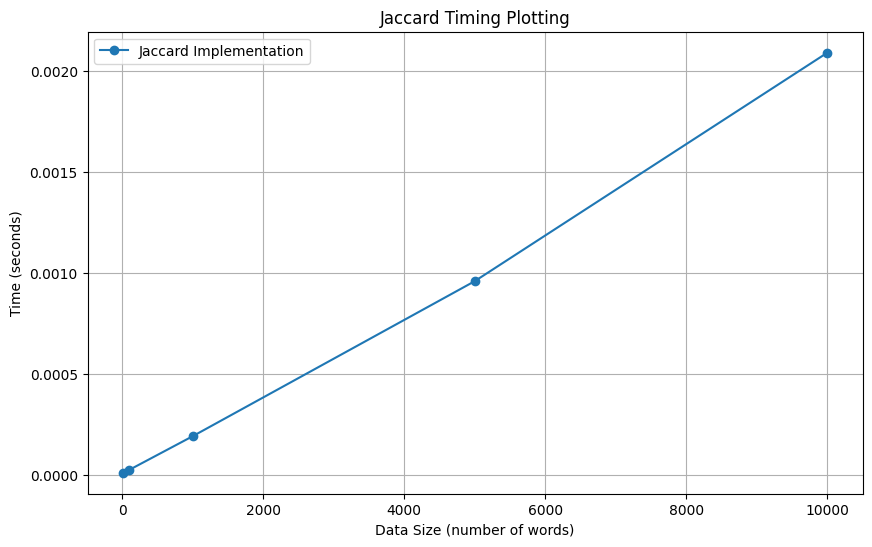

In [50]:
SIZES = [ 10, 100, 1000, 5000, 10000 ]
jaccard_times = []

for size in SIZES:
    doc1_subset = doc1[: size]
    doc2_subset = doc2[: size]
    
    # Timing numpy implementation
    jaccard_mean, _ = timeit(jaccard, doc1_subset, doc2_subset, repeats=10)
    jaccard_times.append( jaccard_mean )

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(SIZES, jaccard_times, label="Jaccard Implementation", marker="o")
plt.xlabel("Data Size (number of words)")
plt.ylabel("Time (seconds)")
plt.title("Jaccard Timing Plotting")
plt.legend()
plt.grid(True)
plt.show() 

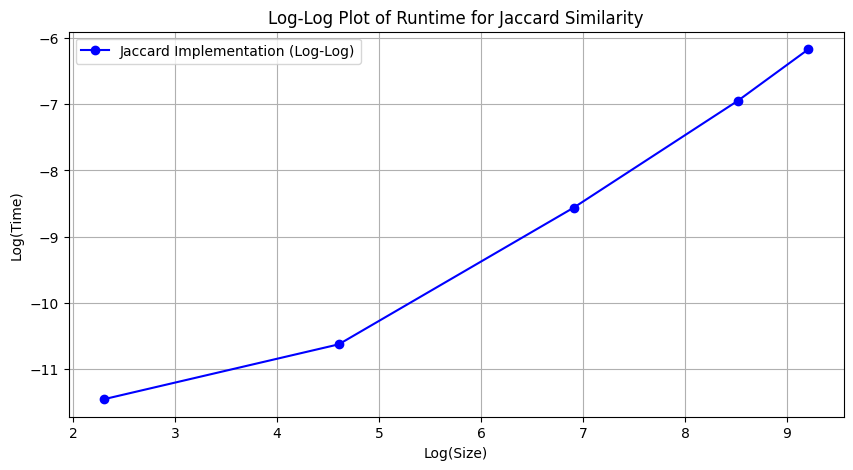

Jaccard Constans
10         1.060963e-06
100        2.429485e-07
1000       1.910925e-07
5000       1.918221e-07
10000      2.090788e-07

In [56]:
log_sizes = [math.log(size) for size in SIZES]
log_jaccard_times = [math.log(time) for time in jaccard_times]

plt.figure(figsize=(10, 5))
plt.plot(log_sizes, log_jaccard_times, label="Jaccard Implementation (Log-Log)", color='blue', marker="o")
plt.xlabel("Log(Size)")
plt.ylabel("Log(Time)")
plt.title("Log-Log Plot of Runtime for Jaccard Similarity")
plt.legend()
plt.grid(True)
plt.show()

# Finding constans
jaccard_constans = [float(jaccard_t / size) for jaccard_t, size in zip(jaccard_times, SIZES)]

constans = {
    'Jaccard Constans': jaccard_constans,
}

const_df = pd.DataFrame(constans, columns=['Jaccard Constans'], index=SIZES)
const_df

### 3 &rarr; What is the theoretical worst-case running time for computing all-pairs similarities on a data matrix such as the one provided? Does it make a difference which similarity measure is being computed? Estimate the key constant in the all-pairs similarity run-time formula for both Jaccard and cosine similarity.

In [52]:
def all_pairs_similarity(data, similarity_func, repeats=10):
    """
    Computes all-pairs similarity for all columns in a data matrix using the specified similarity function,
    and measures the execution time using the `timeit` utility.

    Parameters:
        data (np.ndarray): A 2D numpy array where each column represents a document.
        similarity_func (function): A similarity function taking two numpy arrays (columns).
        repeats (int): Number of times to repeat the timing for averaging.

    Returns:
        tuple: (float, float) The mean and standard deviation of the execution times.
    """
    def compute():
        n = data.shape[1]
        for i in range(n):
            for j in range(i + 1, n):
                _ = similarity_func(data[:, i], data[:, j])

    mean_time, std_time = timeit(compute, repeats=repeats)
    return float(mean_time)

In [53]:
jaccard_all_pair_runtime = all_pairs_similarity( data = data_matrix, similarity_func = jaccard )
cosine_all_pair_runtime = all_pairs_similarity( data = data_matrix, similarity_func = cosine )

In [54]:
print(f'Runtime of Jaccard Similarity for all pair similarity: {jaccard_all_pair_runtime:.4f} seconds')
print(f'Runtime of Cosine Similarity for all pair similarity: {cosine_all_pair_runtime:.4f} seconds')

Runtime of Jaccard Similarity for all pair similarity: 0.4112 seconds
Runtime of Cosine Similarity for all pair similarity: 0.8078 seconds


In [55]:
jaccard_diff = jaccard_all_pair_runtime / cosine_all_pair_runtime * 100
jaccard_diff = 100 - jaccard_diff
print(f'{"-" * 20} Printing the Differences of Run-Time {"-" * 20}\n\n\tJaccard Similarity is {jaccard_diff:.2f}% faster than Cosine Similarity\n\n{"-" * 78}')

-------------------- Printing the Differences of Run-Time --------------------

	Jaccard Similarity is 49.10% faster than Cosine Similarity

------------------------------------------------------------------------------


In [74]:
docs_data = [i for i in range( 1, 16 )]


def jaccard_all_pairs_similarites(data, docs):
    mean_time = []
    pairs = []
    for i in range(len(docs)):
        for j in range(i + 1, len(docs)):
            mean, _ = timeit(lambda: jaccard(data[:, i], data[:, j]), repeats=10)
            mean_time.append(mean)
            pairs.append((docs[i], docs[j]))
    return mean_time, pairs


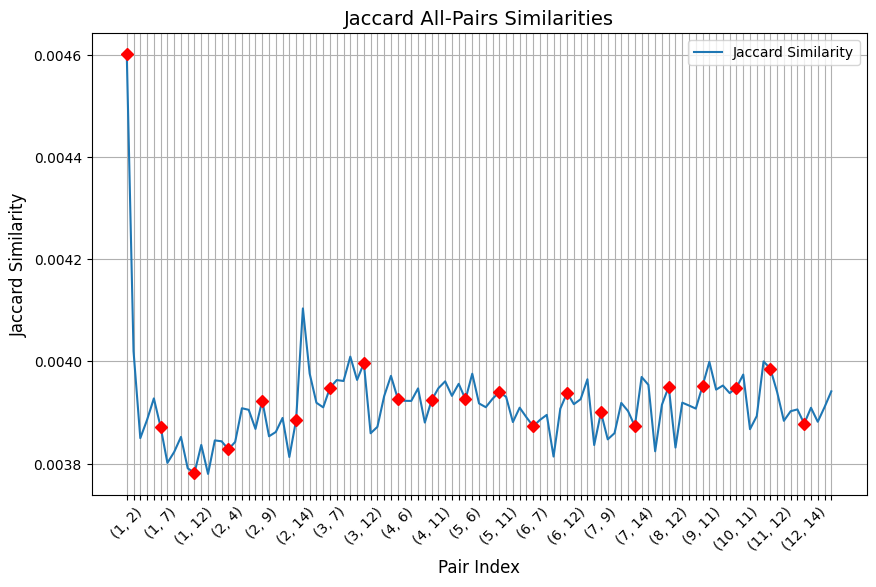

In [78]:
jaccard_similarities_time, pairs = jaccard_all_pairs_similarites(data_matrix, docs_data)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(range(len(jaccard_similarities_time)), jaccard_similarities_time, linestyle='-', label='Jaccard Similarity')
pair_labels = [f"({p[0]}, {p[1]})" if idx % 5 == 0 else "" for idx, p in enumerate(pairs)]

plt.xticks(ticks=range(len(pairs)), labels=pair_labels, rotation=45, fontsize=10)
# Highlight xticks with markers
for idx, label in enumerate(pair_labels):
    if label:
        plt.plot(idx, jaccard_similarities_time[idx], marker='D', color='red', label='_nolegend_')
plt.title('Jaccard All-Pairs Similarities', fontsize=14)
plt.xlabel('Pair Index', fontsize=12)
plt.ylabel('Jaccard Similarity', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()